## Predict fare of Airline tickets using machine learning

In this project we will predict tickets price of airline using Machine Learning. We're using Kaggle's Flight Price Prediction data. 

In [1]:
# Import all the needed modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

### Data


In [84]:
# Load data
train_data=pd.read_excel(r"C:\Users\DELL\Downloads\Data_Train.xlsx")

In [85]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [86]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [87]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [88]:
train_data.shape

(10683, 11)

**So our training data has 10683 rows and have 10 feature variables and 1 label or target column**

### Data Preprocessing

In [89]:
# Check for missing values 
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [90]:
# drop that missing value row
train_data.dropna(inplace=True)
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [91]:
train_data.shape

(10682, 11)

In [92]:
train_data["Date_of_Journey"][71]

'09/03/2019'

In [93]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [94]:
# Let's change datatypes of Date_of_Journey to datetime datatype
train_data["Date_of_Journey"]=train_data["Date_of_Journey"].astype("datetime64")

In [95]:
train_data.isna().sum()

Airline              0
Date_of_Journey    341
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info      0
Price                0
dtype: int64

In [96]:
train_data.dropna(inplace=True)

In [97]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [98]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [99]:
def change_to_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [100]:
for i in ["Dep_Time","Arrival_Time"]:
    change_to_datetime(i)
    

In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10341 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10341 non-null  object        
 1   Date_of_Journey  10341 non-null  datetime64[ns]
 2   Source           10341 non-null  object        
 3   Destination      10341 non-null  object        
 4   Route            10341 non-null  object        
 5   Dep_Time         10341 non-null  datetime64[ns]
 6   Arrival_Time     10341 non-null  datetime64[ns]
 7   Duration         10341 non-null  object        
 8   Total_Stops      10341 non-null  object        
 9   Additional_Info  10341 non-null  object        
 10  Price            10341 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 969.5+ KB


In [102]:
train_data["Journey_day"]=train_data["Date_of_Journey"].dt.day
train_data["Journey_month"]=train_data["Date_of_Journey"].dt.month

In [103]:
train_data.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-04-27 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-27 05:50:00,2022-04-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-27 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-04-27 18:05:00,2022-04-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-04-27 16:50:00,2022-04-27 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2022-04-27 09:00:00,2022-04-27 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2022-04-27 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2022-04-27 08:00:00,2022-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2022-04-27 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2022-04-27 11:25:00,2022-04-27 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [104]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
dtype: int64

In [105]:
# Drop the Date of Journey Column
train_data.drop("Date_of_Journey",axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-27 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-27 05:50:00,2022-04-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-27 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-27 18:05:00,2022-04-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-27 16:50:00,2022-04-27 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [106]:
# Drop the Additional_Info Column as it's not adding any value to the data
train_data.drop("Additional_Info",axis=1,inplace=True)

In [107]:
def extract_minute(df,col):
    df[col+"_minutes"]=df[col].dt.minute


def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)
    
extract_minute(train_data,"Dep_Time")    
extract_hour(train_data,"Dep_Time")
drop_column(train_data,"Dep_Time")

In [108]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_minutes,Dep_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-27 13:15:00,7h 25m,2 stops,7662,5,1,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,13882,6,9,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-04-27 23:30:00,5h 25m,1 stop,6218,5,12,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-04-27 21:35:00,4h 45m,1 stop,13302,3,1,50,16


In [109]:
extract_minute(train_data,"Arrival_Time")    
extract_hour(train_data,"Arrival_Time")
drop_column(train_data,"Arrival_Time")

In [110]:
train_data.head()      

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_minutes,Dep_Time_hour,Arrival_Time_minutes,Arrival_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,20,22,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,50,5,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,6,9,25,9,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5,12,5,18,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3,1,50,16,35,21


## Now do it for duration column

In [111]:
def hour(x):
    return x.split(" ")[0][0:-1]

def minute(x):
    return x.split(" ")[1][0:-1]

In [112]:
train_data.Duration[0]
        

'2h 50m'

In [113]:
if "m" not in train_data.Duration[2]:
    train_data.Duration[2]= train_data.Duration[2] + " 0m"

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
duration=list(train_data["Duration"])

In [115]:
for i in range(len(duration)):
    if "m"  not in duration[i]:
        duration[i]=duration[i] + " 0m"
    elif "h"  not in duration[i]:
        duration[i]="0h " + duration[i]
        

In [116]:
train_data["Duration"]=duration

In [117]:
train_data["Duration_hours"]=train_data["Duration"].apply(hour)

In [118]:
train_data["Duration_minutes"]=train_data["Duration"].apply(minute)

In [119]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_minutes,Dep_Time_hour,Arrival_Time_minutes,Arrival_Time_hour,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,13882,6,9,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5,12,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3,1,50,16,35,21,4,45


In [120]:
train_data["Duration_hours"]=train_data["Duration_hours"].astype(int)
train_data["Duration_minutes"]=train_data["Duration_minutes"].astype(int)
train_data.drop("Duration",axis=1,inplace=True)

In [121]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=="O"]
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops']

In [122]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!="O"]
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_minutes',
 'Dep_Time_hour',
 'Arrival_Time_minutes',
 'Arrival_Time_hour',
 'Duration_hours',
 'Duration_minutes']

## Let's convert our categorical data into numeral data with the help of one hot encoding and label encoding

In [123]:
categorical=train_data[cat_col]

In [124]:
categorical["Airline"].value_counts()

Jet Airways                          3735
IndiGo                               1969
Air India                            1679
Multiple carriers                    1191
SpiceJet                              796
Vistara                               456
Air Asia                              309
GoAir                                 185
Multiple carriers Premium economy      13
Jet Airways Business                    6
Trujet                                  1
Vistara Premium economy                 1
Name: Airline, dtype: int64

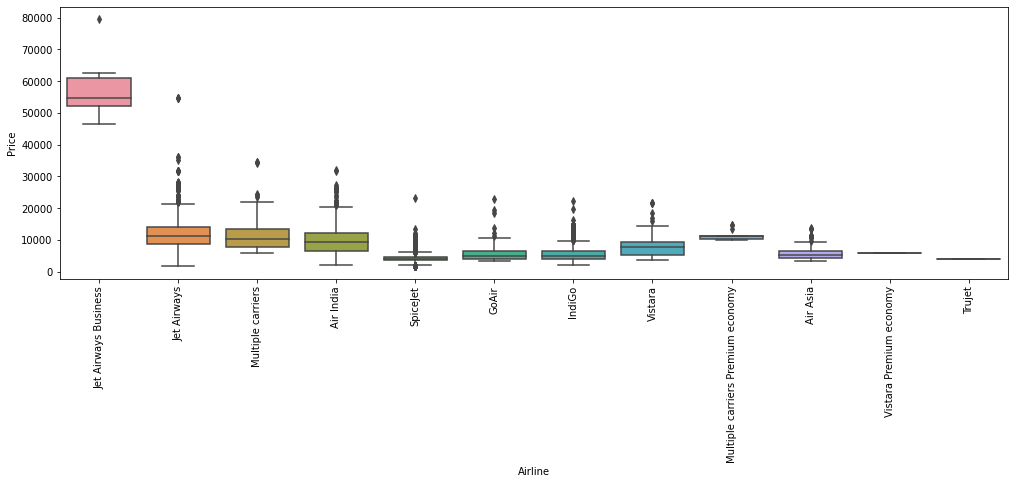

In [125]:
plt.figure(figsize=(17,5))
sns.boxplot(x="Airline",y="Price",data=train_data.sort_values("Price",ascending=False))
plt.xticks(rotation="vertical");

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

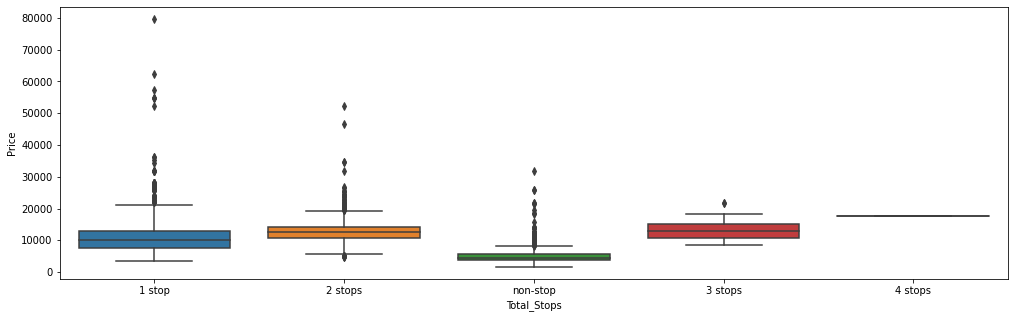

In [126]:
plt.figure(figsize=(17,5))
sns.boxplot(x="Total_Stops",y="Price",data=train_data.sort_values("Price",ascending=False))

In [127]:
Airline=pd.get_dummies(categorical["Airline"],drop_first=True)

In [128]:
categorical["Source"].value_counts()

Delhi       4527
Kolkata     2856
Banglore    1903
Mumbai       684
Chennai      371
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

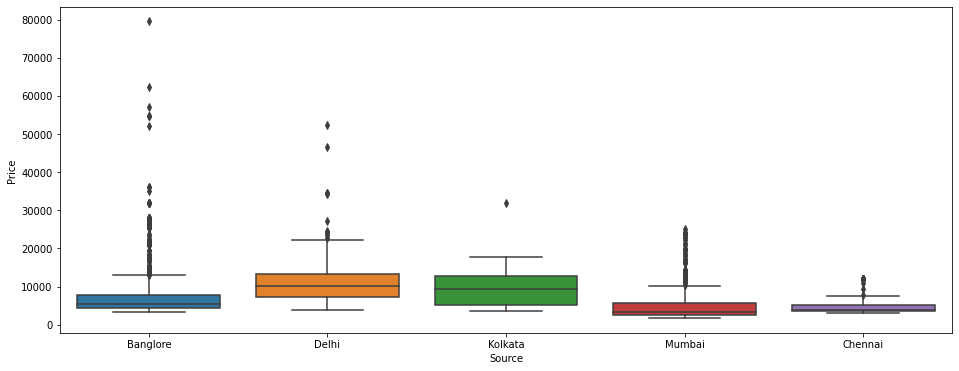

In [129]:
plt.figure(figsize=(16,6))
sns.boxplot(x="Source",y="Price",data=train_data.sort_values("Price",ascending=False))

In [130]:
Source=pd.get_dummies(categorical["Source"],drop_first=True)

In [131]:
categorical["Destination"].value_counts()

Cochin       4527
Banglore     2856
Delhi        1265
Hyderabad     684
New Delhi     638
Kolkata       371
Name: Destination, dtype: int64

In [132]:
Destination=pd.get_dummies(categorical["Destination"],drop_first=True)

In [133]:
categorical["Route1"]=categorical["Route"].str.split("→").str[0]
categorical["Route2"]=categorical["Route"].str.split("→").str[1]
categorical["Route3"]=categorical["Route"].str.split("→").str[2]
categorical["Route4"]=categorical["Route"].str.split("→").str[3]
categorical["Route5"]=categorical["Route"].str.split("→").str[4]


C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [134]:
categorical.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Route1             0
Route2             0
Route3          3341
Route4          8796
Route5         10298
dtype: int64

In [135]:
for i in ["Route3","Route4","Route5"]:
    categorical[i].fillna("None",inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [136]:
categorical.isna().sum()

Airline        0
Source         0
Destination    0
Route          0
Total_Stops    0
Route1         0
Route2         0
Route3         0
Route4         0
Route5         0
dtype: int64

In [137]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [138]:
categorical.drop("Route",axis=1,inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [139]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Route1', 'Route2',
       'Route3', 'Route4', 'Route5'],
      dtype='object')

In [140]:
categorical["Route1"].value_counts()

DEL     4527
CCU     2856
BLR     1903
BOM      684
MAA      371
Name: Route1, dtype: int64

In [141]:
categorical["Route2"].value_counts()

 BOM     3746
 DEL     1440
 BLR      709
 DEL      663
 HYD      608
 HYD      547
 CCU      371
 JAI      260
 AMD      256
 MAA      252
 BLR      235
 COK      213
 BBI      112
 IDR      104
 GAU       88
 NAG       82
 CCU       67
 GOI       67
 PNQ       64
 LKO       60
 BHO       57
 IXR       52
 JDH       41
 ATQ       40
 BDQ       36
 IXB       21
 UDR       19
 RPR       19
 TRV       17
 IXC       13
 COK       12
 IXU       12
 VNS       11
 VGA       10
 PAT       10
 KNU       10
 GWL        8
 DED        3
 JLR        1
 VTZ        1
 NDC        1
 IXZ        1
 IXA        1
 STV        1
Name: Route2, dtype: int64

## Route has large number of categories so we will us Label encoding here 

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
encoder=LabelEncoder()
for i in ["Route1","Route2","Route3","Route4","Route5"]:
    categorical[i]=encoder.fit_transform(categorical[i])

In [144]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,10,5
1,Air India,Kolkata,Banglore,2 stops,2,24,1,1,5
2,Jet Airways,Delhi,Cochin,2 stops,3,31,4,3,5
3,IndiGo,Kolkata,Banglore,1 stop,2,33,3,10,5
4,IndiGo,Banglore,New Delhi,1 stop,0,33,8,10,5


## For Total Stops

In [145]:
dict1={"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4}

In [146]:
categorical.Total_Stops.value_counts()

1 stop      5455
non-stop    3341
2 stops     1502
3 stops       42
4 stops        1
Name: Total_Stops, dtype: int64

In [147]:
categorical["Total_Stops"]=categorical["Total_Stops"].map(dict1)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [148]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,10,5
1,Air India,Kolkata,Banglore,2,2,24,1,1,5
2,Jet Airways,Delhi,Cochin,2,3,31,4,3,5
3,IndiGo,Kolkata,Banglore,1,2,33,3,10,5
4,IndiGo,Banglore,New Delhi,1,0,33,8,10,5


In [149]:
categorical.drop("Airline",axis=1,inplace=True)
categorical.drop("Source",axis=1,inplace=True)
categorical.drop("Destination",axis=1,inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Concatenate Data

In [150]:
training_data=pd.concat([Airline,Source,Destination,categorical,train_data[cont_col]],axis=1)

In [151]:
training_data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Route1,Route2,Route3,Route4,Route5,Price,Journey_day,Journey_month,Dep_Time_minutes,Dep_Time_hour,Arrival_Time_minutes,Arrival_Time_hour,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,29,10,5,3897,24,3,20,22,10,1,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,24,1,1,5,7662,5,1,50,5,15,13,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,3,31,4,3,5,13882,6,9,25,9,25,4,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,33,3,10,5,6218,5,12,5,18,30,23,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,33,8,10,5,13302,3,1,50,16,35,21,4,45


In [152]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10341 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Air India                          10341 non-null  uint8
 1   GoAir                              10341 non-null  uint8
 2   IndiGo                             10341 non-null  uint8
 3   Jet Airways                        10341 non-null  uint8
 4   Jet Airways Business               10341 non-null  uint8
 5   Multiple carriers                  10341 non-null  uint8
 6   Multiple carriers Premium economy  10341 non-null  uint8
 7   SpiceJet                           10341 non-null  uint8
 8   Trujet                             10341 non-null  uint8
 9   Vistara                            10341 non-null  uint8
 10  Vistara Premium economy            10341 non-null  uint8
 11  Chennai                            10341 non-null  uint8
 12  Delhi             

In [153]:
pd.set_option("display.max_columns",35)
training_data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Route1,Route2,Route3,Route4,Route5,Price,Journey_day,Journey_month,Dep_Time_minutes,Dep_Time_hour,Arrival_Time_minutes,Arrival_Time_hour,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,29,10,5,3897,24,3,20,22,10,1,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,24,1,1,5,7662,5,1,50,5,15,13,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,3,31,4,3,5,13882,6,9,25,9,25,4,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,33,3,10,5,6218,5,12,5,18,30,23,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,33,8,10,5,13302,3,1,50,16,35,21,4,45


## Handling Outliers

In [154]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


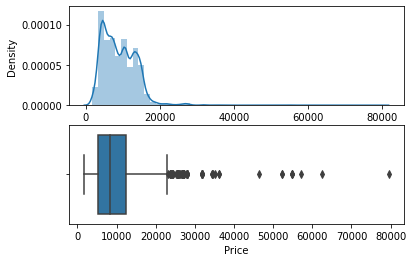

In [155]:
plot(training_data,"Price")

In [156]:
training_data["Price"]=np.where(training_data["Price"]>=30000,training_data["Price"].median(),training_data["Price"])

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


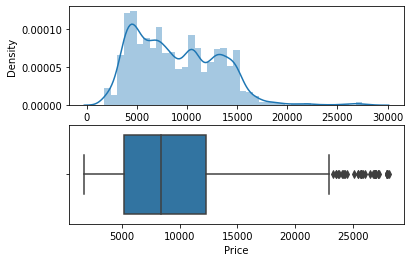

In [157]:
plot(training_data,"Price")

## Feature Selection

In [158]:
from sklearn.feature_selection import mutual_info_classif

In [159]:
X=training_data.drop("Price",axis=1)
y=training_data["Price"]

In [160]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10341 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Air India                          10341 non-null  uint8  
 1   GoAir                              10341 non-null  uint8  
 2   IndiGo                             10341 non-null  uint8  
 3   Jet Airways                        10341 non-null  uint8  
 4   Jet Airways Business               10341 non-null  uint8  
 5   Multiple carriers                  10341 non-null  uint8  
 6   Multiple carriers Premium economy  10341 non-null  uint8  
 7   SpiceJet                           10341 non-null  uint8  
 8   Trujet                             10341 non-null  uint8  
 9   Vistara                            10341 non-null  uint8  
 10  Vistara Premium economy            10341 non-null  uint8  
 11  Chennai                            10341 non-null  uin

In [161]:
training_data["Journey_day"]=training_data["Journey_day"].astype(int)
training_data["Journey_month"]=training_data["Journey_month"].astype(int)
training_data["Price"]=training_data["Price"].astype(int)

In [162]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10341 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Air India                          10341 non-null  uint8
 1   GoAir                              10341 non-null  uint8
 2   IndiGo                             10341 non-null  uint8
 3   Jet Airways                        10341 non-null  uint8
 4   Jet Airways Business               10341 non-null  uint8
 5   Multiple carriers                  10341 non-null  uint8
 6   Multiple carriers Premium economy  10341 non-null  uint8
 7   SpiceJet                           10341 non-null  uint8
 8   Trujet                             10341 non-null  uint8
 9   Vistara                            10341 non-null  uint8
 10  Vistara Premium economy            10341 non-null  uint8
 11  Chennai                            10341 non-null  uint8
 12  Delhi             

In [163]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp.columns=["importance"]
imp.sort_values(by="importance",ascending=False)

,importance
Route2,2.833744
Route3,2.280558
Total_Stops,2.157262
Route1,2.048040
Arrival_Time_hour,1.872298
Duration_hours,1.792119
Arrival_Time_minutes,1.608934
Delhi,1.563399
Cochin,1.537568
Dep_Time_hour,1.459343


In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [166]:
X_train.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Route1,Route2,Route3,Route4,Route5,Journey_day,Journey_month,Dep_Time_minutes,Dep_Time_hour,Arrival_Time_minutes,Arrival_Time_hour,Duration_hours,Duration_minutes
7543,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,29,10,5,5,1,10,11,5,14,2,55
5681,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,5,29,10,5,3,9,15,14,45,16,2,30
9295,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,7,6,10,5,18,5,0,7,0,21,14,0
8331,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,4,8,29,10,5,6,6,35,19,55,21,2,20
2954,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,7,3,10,5,4,1,25,8,45,20,12,20


## First we will try our dataset on random forest regressor

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [169]:
model.score(X_test,y_test)

0.8206353868632716

In [170]:
y_pred=model.predict(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

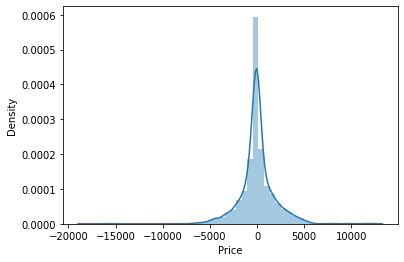

In [171]:
sns.distplot(y_test - y_pred)

## For most of the cases our model is giving 0 error or zero loss 

## Parameters Hypertuning 

**Let's Find the best parameters for our model using GridSearchCV or RandomizedSearchCV**

In [173]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rsc_grid={"n_estimators":[20,50,100,200],
          "max_depth":[None,2,5,10],
          "max_features":[0.5,1,"sqrt","auto"],
          "min_samples_split":[2,4,8,14],
          "min_samples_leaf":[1,2,3,5,10],
          "max_samples":[None]
}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rsc_grid,cv=5,n_iter=20,verbose=True)

# Fit the model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 1min 34s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 2, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [None],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [2, 4, 8, 14],
                                        'n_estimators': [20, 50, 100, 200]},
                   verbose=True)

In [174]:
# Get Best parameters
rs_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_features': 0.5,
 'max_depth': None}

In [175]:
rs_model.score(X_test,y_test)

0.8367154179178564

**Before Hyperparameters tuning our model r^2 score was around .82 but after performing hyperparameter tunining we get a score of .835 which is slighltly better than our previous model**

## Save the model

In [177]:
import pickle

pkl_file=r"C:\Users\DELL\Desktop\Real_World_DS_Projects\Project_1_(Airline Ticket Price)\models\reg_model_airline.pkl"

with open(pkl_file,"wb") as file:
    pickle.dump(rs_model,file)



## Load The Model

In [178]:
with open(pkl_file,"rb") as file:
    my_model=pickle.load(file)
    
my_model

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 2, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [None],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [2, 4, 8, 14],
                                        'n_estimators': [20, 50, 100, 200]},
                   verbose=True)

**Now you can make predictions using this saved model**